# Logistic Regression

## Classification
`Classification` is a predictive modeling task where the target variable $y$ takes on a small number of `discrete values` (labels), rather than continuous ranges.

### Binary Classification.
The simplest form is `binary classification`, where $y\in {\{0,1\}}$.
- **0 (Negative Class)**: Often denoted by "-" (e.g., "Not Spam").
- **1 (Positive Class)**: Often denoted by "+" (e.g., "Spam").

### Why Linear Regression Fails
While it is tempting to use `Linear Regression` and apply a threshold (e.g., mapping predictions > 0.5 to 1), this is generally ineffective.
- **No-Linearity**: Classification data doesn't follow a straight line.
- **Outliers**: Linear regression is hightly sensitive to outliers, which can shift the decision boundary and lead to incorrect predictions.
- **Invalid Range**: Linear regression can predict values far outside the $[0,1]$ range, which makes little sense for probability-based classification.

### Key Terminology
- **Feature $(x^{(i)})$**: The input variable used to make a prediction (e.g., words in an email).
- **Label $(y^{(i)})$**: The actual class or category assigned to a training example.
- **Multi-class**: A generalization of binary classification where y can take on more than two discrete values (e.g., classifying an image as a "dog", "cat", "bird").

## Hypothesis Representation
To ensure predictions stay within the valid range for classification $(0\le h_\theta(x)\le 1)$, we transition from linear regression to `Logistic Regression` by using the `Sigmoid Function` (also known as the `Logistic Function`).

### The Sigmoid Function (Logistic Function)
The linear prediction $z=\theta^Tx$ is plugged into the sigmoid function $g(z)$ to map any real number to a value between 0 and 1.
$$
g(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-(\theta^Tx)}}
$$

### The Hypethesis Model
The resulting hypethesis $h_\theta(x)$ represents the `probability` that the output $y$ is equal to 1, given the input $x$ and parameter $\theta$:
$$
h_\theta(x)=g(\theta^Tx)=P(y=1|x;\theta)
$$

### Probability Interpretation
Because the total probability must equal 1, the likehood of each class if complementary:
- **Probability** $y=1:h_\theta(x)$
- **Probability** $y=0:1-h_\theta(x)$

> **Example**: If $h_\theta(x)=0.7$, there is a **70%** chance the label is 1 and a **30%** chance it is 0.

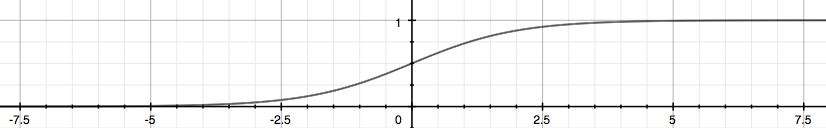

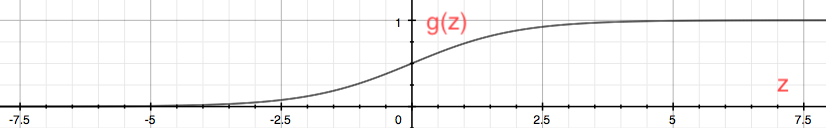

## Decision Boundry Summary
The `Decision Boundry` is the line (or surface) that separates different classes in a classification problem. It is determined by the hypothesis function and the chosen threshold.

### The Threshold Logic
To make a discrete prediction $(y=0\ or\ y=1)$, we apply a threshold to the logistic function $g(z)$. For a standard threshold of 0.5:
- **Predict** $y=1$ when $h_\theta(x)\ge 0.5$
- **Predict** $y=0$ when $h_\theta(x)<0.5$

### Role of the Linear Predictor
Since $g(z)\ge 0.5$ whenever $z\ge 0$, the decision depends entirely on the sign of the input $\theta^Tx$:
- $y=1\ if\ \theta^Tx\ge 0$
- $y=0\ if\ \theta^Tx<0$

The equation $\theta^Tx=0$ defines the `Decision Boundary` itself.


### Shapes of Boundaries
The boundary does not have to be a straight line. Its shape depends on the features included in $\theta^Tx$:
- **Linear Boundaries**: Create by simple linear combinations (e.g., $x_1+x_2=5$).
- **Non-linear Boundaries**: Created by using polynomial features (e.g., $x_1^2+x_2^2=1$ creates a `circular` boundary).

>**Example**: 
>$$
\theta=\begin{bmatrix}
5\\
-1\\
0\\
\end{bmatrix}\\
y=1\\
if:\ 5+(-1)x_1+0.x_2\ge0\\
=>[5-x_1]>0\\
=>-x_1\ge -5\\
x_1\le 5
$$
This results in a `vertical line` at $x_1=5$, where everything to the left is classified as the positive class.
